In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
START_YR = 2022
END_YR = 2050
year_arr = range(START_YR,END_YR,1)

BEB_KWH_AVE = 345.9 #kWh/day BEB consumption average
BEB_KWH_MAX = 460.5  #kWh/day BEB consumption max
FCEB_KG_H2_AVE = 18.17 #kg-h2/day consumption average
FCEB_KG_H2_MAX = 21.35 #kg-h2/day consumption max

DAILY_MILEAGE_BEB1 = 98 #km/day per BEB
DAILY_MILEAGE_BEB2 = 98 #km/day per BEB
DAILY_MILEAGE_FCEB = 98 #km/day per FCEB
DAILY_MILEAGE_DIESEL = 98

FUEL_COST_DIESEL = 1.48 # $/L
FUEL_COST_ELEC = 0.36 # $/kWh
FUEL_COST_H2 = 8.00 # $/kg-h2

FUEL_ECO_DIESEL = 0.47 # L-diesel/km
FUEL_ECO_ELEC_AVE = 1.60 # kWh/km
FUEL_ECO_ELEC_MAX = 2.72 # kWh/km
FUEL_ECO_H2_AVE = 0.10 # kg-h2/km
FUEL_ECO_H2_MAX = 0.13 # kg-h2/km

In [38]:
diesel_buses = [22,22,21,21,20,20,20,18,16,16,16,12,8,7,4,0,0,0,0,0,0,0,0,0,0,0,0,0,]
fc_buses = [0,0,1,1,2,2,2,4,6,6,6,10,14,15,18,21,21,21,21,21,21,21,21,21,21,21,21,21,]
elec_buses1 = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
elec_buses2 = [3,3,3,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,9,]

In [39]:
fleet_dict = {
    'Diesel Count': diesel_buses,
    'BEB1 Count': elec_buses1,
    'BEB2 Count': elec_buses2,
    'FCEB Count': fc_buses
}
fleet_comp = pd.DataFrame(fleet_dict, index=year_arr)
fleet_comp['ZEB Count'] = fleet_comp['BEB1 Count']+ fleet_comp['BEB2 Count'] + fleet_comp['FCEB Count']
fleet_comp.head()

,Diesel Count,BEB1 Count,BEB2 Count,FCEB Count,ZEB Count
2022,22,1,3,0,4
2023,22,1,3,0,4
2024,21,1,3,1,5
2025,21,1,8,1,10
2026,20,1,8,2,11


In [43]:
fleet_comp['Diesel Consumption'] = fleet_comp['Diesel Count'] * DAILY_MILEAGE_DIESEL * FUEL_ECO_DIESEL
fleet_comp['BEB Ave Consumption'] = fleet_comp['BEB1 Count'] *  DAILY_MILEAGE_BEB1 * FUEL_ECO_ELEC_AVE + fleet_comp['BEB2 Count'] *  DAILY_MILEAGE_BEB2 * FUEL_ECO_ELEC_AVE
fleet_comp['FCEB Ave Consumption'] = fleet_comp['FCEB Count'] * DAILY_MILEAGE_FCEB * FUEL_ECO_H2_AVE

fleet_comp['Diesel Fuel Cost'] = fleet_comp['Diesel Consumption'] * FUEL_COST_DIESEL
fleet_comp['BEB Ave Fuel Cost'] = fleet_comp['BEB Ave Consumption'] * FUEL_COST_ELEC
fleet_comp['FCEB Ave Fuel Cost'] = fleet_comp['FCEB Ave Consumption'] * FUEL_COST_H2

fleet_comp['BEB Max Consumption'] = fleet_comp['BEB1 Count'] *  DAILY_MILEAGE_BEB1 * FUEL_ECO_ELEC_MAX + fleet_comp['BEB2 Count'] *  DAILY_MILEAGE_BEB2 * FUEL_ECO_ELEC_MAX
fleet_comp['FCEB Max Consumption'] = fleet_comp['FCEB Count'] *  DAILY_MILEAGE_FCEB * FUEL_ECO_H2_MAX

fleet_comp['BEB Max Fuel Cost'] = fleet_comp['BEB Max Consumption'] * FUEL_COST_ELEC
fleet_comp['FCEB Max Fuel Cost'] = fleet_comp['FCEB Max Consumption'] * FUEL_COST_H2
fleet_comp.head()

,Diesel Count,BEB1 Count,BEB2 Count,FCEB Count,ZEB Count,Diesel Consumption,BEB Ave Consumption,FCEB Ave Consumption,Diesel Fuel Cost,BEB Ave Fuel Cost,FCEB Ave Fuel Cost,BEB Max Consumption,FCEB Max Consumption,BEB Max Fuel Cost,FCEB Max Fuel Cost
2022,22,1,3,0,4,1013.32,627.2,0.0,1499.7136,225.792,0.0,1066.24,0.00,383.8464,0.00
2023,22,1,3,0,4,1013.32,627.2,0.0,1499.7136,225.792,0.0,1066.24,0.00,383.8464,0.00
2024,21,1,3,1,5,967.26,627.2,9.8,1431.5448,225.792,78.4,1066.24,12.74,383.8464,101.92
2025,21,1,8,1,10,967.26,1411.2,9.8,1431.5448,508.032,78.4,2399.04,12.74,863.6544,101.92
2026,20,1,8,2,11,921.20,1411.2,19.6,1363.3760,508.032,156.8,2399.04,25.48,863.6544,203.84


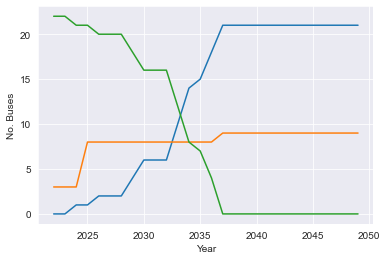

In [51]:
plt.plot(fleet_comp.index, fleet_comp['FCEB Count'])
plt.plot(fleet_comp.index, fleet_comp['BEB2 Count'])
plt.plot(fleet_comp.index, fleet_comp['Diesel Count'])
plt.xlabel('Year')
plt.ylabel('No. Buses')
plt.show()

In [1]:
print("WE NEED \n\n TO LEARN PYTHON \n\n AS QUICKLY AS POSSIBLE")

WE NEED 

 TO LEARN PYTHON 

 AS QUICKLY AS POSSIBLE
